<a href="https://colab.research.google.com/github/AdityaSinghDevs/pytorch-learn/blob/main/learn/building_a_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## USING BREAST CANCER DATASET
### Accuracy or final result is not important we are looking at the flow

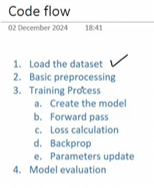

In [308]:
import numpy as np
import torch
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [309]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [310]:
df.shape

(569, 33)

In [311]:
df.drop(columns = ['id', 'Unnamed: 32'], inplace = True) #no need to use identity or unnamed

In [312]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Train test split

In [313]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size=0.2)

# Scaling

In [314]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Done to scale data uniformly for betterment of Neural network

In [315]:
X_train

array([[-1.58036992, -0.16658212, -1.56865309, ..., -1.73448509,
         0.39677352, -0.14420223],
       [-0.91069755, -1.61517217, -0.93686866, ..., -1.2408004 ,
        -1.18493735, -0.97869258],
       [-0.15214085, -1.94197408, -0.14892223, ..., -0.58961267,
        -0.28720956, -0.66823725],
       ...,
       [-0.64143887, -0.14340468, -0.56787297, ...,  0.65510957,
         2.96012675,  3.20055746],
       [ 0.47902464, -1.2489686 ,  0.44256233, ...,  0.38925557,
        -0.26662674, -0.73622017],
       [-0.5314192 ,  0.16717302, -0.50322526, ..., -0.48435303,
        -0.28879285,  0.26539486]])

In [316]:
y_train

,diagnosis
314,B
296,B
76,B
392,M
466,B
...,...
15,M
126,M
31,M
133,B


# Label encoding : Encoding the labeled values into number

In [317]:
encoder =LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [318]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1])

# Numpy arrays to PyTorch Tensors

In [319]:
X_train_tensor = torch.from_numpy(X_train)
X_test_tensor= torch.from_numpy(X_test)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor= torch.from_numpy(y_test)


In [320]:
X_train.shape #check
# 30 features

(455, 30)

# Now defining the Model

In [321]:
# Model will have 30 features(inputs and weights) and one bias , (single neuron)

In [322]:
class MySimpleNN():

  def __init__(self, X):
    self.weights = torch.randn(X.shape[1], 1, dtype=torch.float64, requires_grad = True)
    self.bias = torch.zeros(1, dtype=torch.float64, requires_grad = True) #initially 0

  def forward(self, X):
    z = torch.matmul(X, self.weights) + self.bias
    y_pred = torch.sigmoid(z)
    return y_pred

  def loss_function(self, y_pred, y):
    # Clamp predictions to avoid log(0)
    epsilon = 1e-7
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)

    # Calculate loss
    loss = -(y_train_tensor * torch.log(y_pred) + (1 - y_train_tensor) * torch.log(1 - y_pred)).mean()
    return loss

# Important Paramaeters

In [323]:
learning_rate = 0.5  # Important params for a nn
epochs = 30

# Training pipeline

In [324]:
# create model
model = MySimpleNN(X_train_tensor)
model.weights

# Define loop

for epoch in range(epochs):

 # Forward pass
 y_pred = model.forward(X_train_tensor)

 # Loss
 loss = model.loss_function(y_pred, y_train_tensor)
 print(f"Epoch : {(epoch + 1)}, Loss : {loss.item()}")

 # Backward pass
 loss.backward()

 #params updated
 with torch.no_grad():
  model.weights -= learning_rate * model.weights.grad
  model.bias -= learning_rate * model.bias.grad

 # Gradient zero
  model.weights.grad.zero_()
  model.bias.grad.zero_()


Epoch : 1, Loss : 1.8811127495180924
Epoch : 2, Loss : 1.6718962722985198
Epoch : 3, Loss : 1.5527918549345587
Epoch : 4, Loss : 1.4638138770485487
Epoch : 5, Loss : 1.3876852404965851
Epoch : 6, Loss : 1.3200128545839225
Epoch : 7, Loss : 1.2583239183296335
Epoch : 8, Loss : 1.2027078947231982
Epoch : 9, Loss : 1.1522989134180204
Epoch : 10, Loss : 1.1055163030603792
Epoch : 11, Loss : 1.0630958645846729
Epoch : 12, Loss : 1.0247699577089173
Epoch : 13, Loss : 0.9903350692414239
Epoch : 14, Loss : 0.959607244209456
Epoch : 15, Loss : 0.9323940962895045
Epoch : 16, Loss : 0.9084797506570335
Epoch : 17, Loss : 0.8876200590030948
Epoch : 18, Loss : 0.8695457552160348
Epoch : 19, Loss : 0.8539711965633863
Epoch : 20, Loss : 0.8406058251983318
Epoch : 21, Loss : 0.8291654515804184
Epoch : 22, Loss : 0.8193814063517718
Epoch : 23, Loss : 0.8110068789088579
Epoch : 24, Loss : 0.8038205969530866
Epoch : 25, Loss : 0.7976282996140082
Epoch : 26, Loss : 0.792262496731177
Epoch : 27, Loss : 0.78

In [325]:
model.weights

tensor([[ 0.5613],
        [-0.0661],
        [-2.9296],
        [ 1.3927],
        [-0.4461],
        [-0.6388],
        [ 0.3454],
        [ 0.2152],
        [ 0.5343],
        [ 0.0587],
        [-0.4293],
        [ 0.0372],
        [-1.4131],
        [ 1.4293],
        [-0.5608],
        [ 0.1568],
        [ 0.3450],
        [ 0.8340],
        [ 1.0140],
        [-1.7115],
        [-0.4009],
        [ 0.0117],
        [ 0.0432],
        [ 1.5254],
        [ 0.1604],
        [-0.7413],
        [-0.0544],
        [-0.1228],
        [-0.8917],
        [ 1.8883]], dtype=torch.float64, requires_grad=True)

# Evaluation

In [326]:
# Run forward pass on test set
with torch.no_grad():
  y_pred = model.forward(X_test_tensor)
  y_pred = (y_pred > 0.9).float() # simple conversion to binary
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f"Accuracy : {accuracy.item()}")



Accuracy : 0.549861490726471
